In [120]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from sklearn.model_selection import train_test_split


random.seed(123) 
np.random.seed(123) 

In [121]:
df=pd.read_csv("merged_dataset.csv",engine="python", sep=",") 
# df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
# df_test.to_csv("testData.csv", index=False)
# df=df_test

In [ ]:
NUMERIC=["Transaction.Amount",'Customer.Age','Account.Age.Days','Quantity']
CATEGORICAL = [x for x in df.columns if x not in NUMERIC]

<Axes: xlabel='Device.Used', ylabel='Count'>

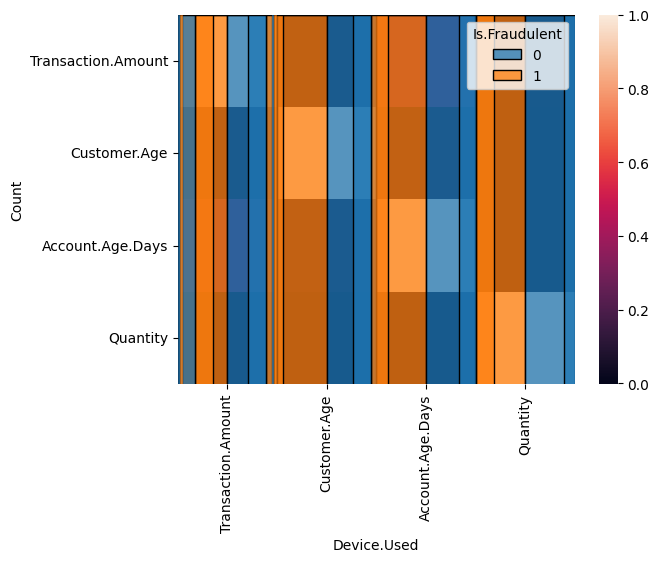

In [34]:
#CATEGORICAL

#SPLIT CELLS BEFORE USE

# NOTHING FANCY
sns.heatmap(df[NUMERIC].corr())
sns.histplot(data=df, x="Device.Used", hue="Is.Fraudulent", multiple="dodge")

#NOTHING FANCY
sns.histplot(data=df, x="Payment.Method", hue="Is.Fraudulent", multiple="dodge")

#NOTHING FANCY
sns.histplot(data=df, x="browser", hue="Is.Fraudulent", multiple="dodge") 

# Perhaps
sns.histplot(data=df, x="Transaction.Hour", hue="Is.Fraudulent", multiple="dodge") 

#NOTING FANCY
sns.histplot(data=df, x= 'Address.Match' , hue="Is.Fraudulent", multiple="dodge") 

In [33]:
#NUMERIC 
#MOST PREDICIVE FEATURE
temp=df.groupby(["Is.Fraudulent"])["Account.Age.Days"].mean()
temp

Is.Fraudulent
0    122.416132
1     58.690784
Name: Account.Age.Days, dtype: float64

In [30]:
temp=df.groupby(["Is.Fraudulent"])["Transaction.Amount"].median()
temp

Is.Fraudulent
0    54.0
1    47.0
Name: Transaction.Amount, dtype: float64

In [ ]:
#Nothing fancy
sns.histplot(data=df,x="Quantity",hue="Is.Fraudulent",multiple="dodge") 
sns.histplot(data=df,x="Customer.Age",hue="Is.Fraudulent") 

In [78]:
df["month"]=df["Transaction.Date"].apply(lambda x : float(x[5:7]) if x[5]!=0 else float(x[6:7]) )
df["day"]=df["Transaction.Date"].apply(lambda x : float(x[8:10]) if x[8]!=0 else float(x[9:10])) 

In [118]:
maximalSplit=0
output=0
for i in range(1,31):
    df["partOfMonth"]=df["day"].apply(lambda x: "First" if x<=i else "Second") 
    temp1=df.loc[(df["partOfMonth"]=="First") & df["Is.Fraudulent"]==1].shape[0]/df.loc[(df["partOfMonth"]=="First")].shape[0]
    if temp1>maximalSplit: 
        maximalSplit=temp1 
        output=i
print(output,maximalSplit) # thus 12 best split

12 0.1045561822472899


In [ ]:
df["partOfMonth"]=df["day"].apply(lambda x: "First" if x<=12 else "Second")

<Axes: xlabel='partOfMonth', ylabel='Count'>

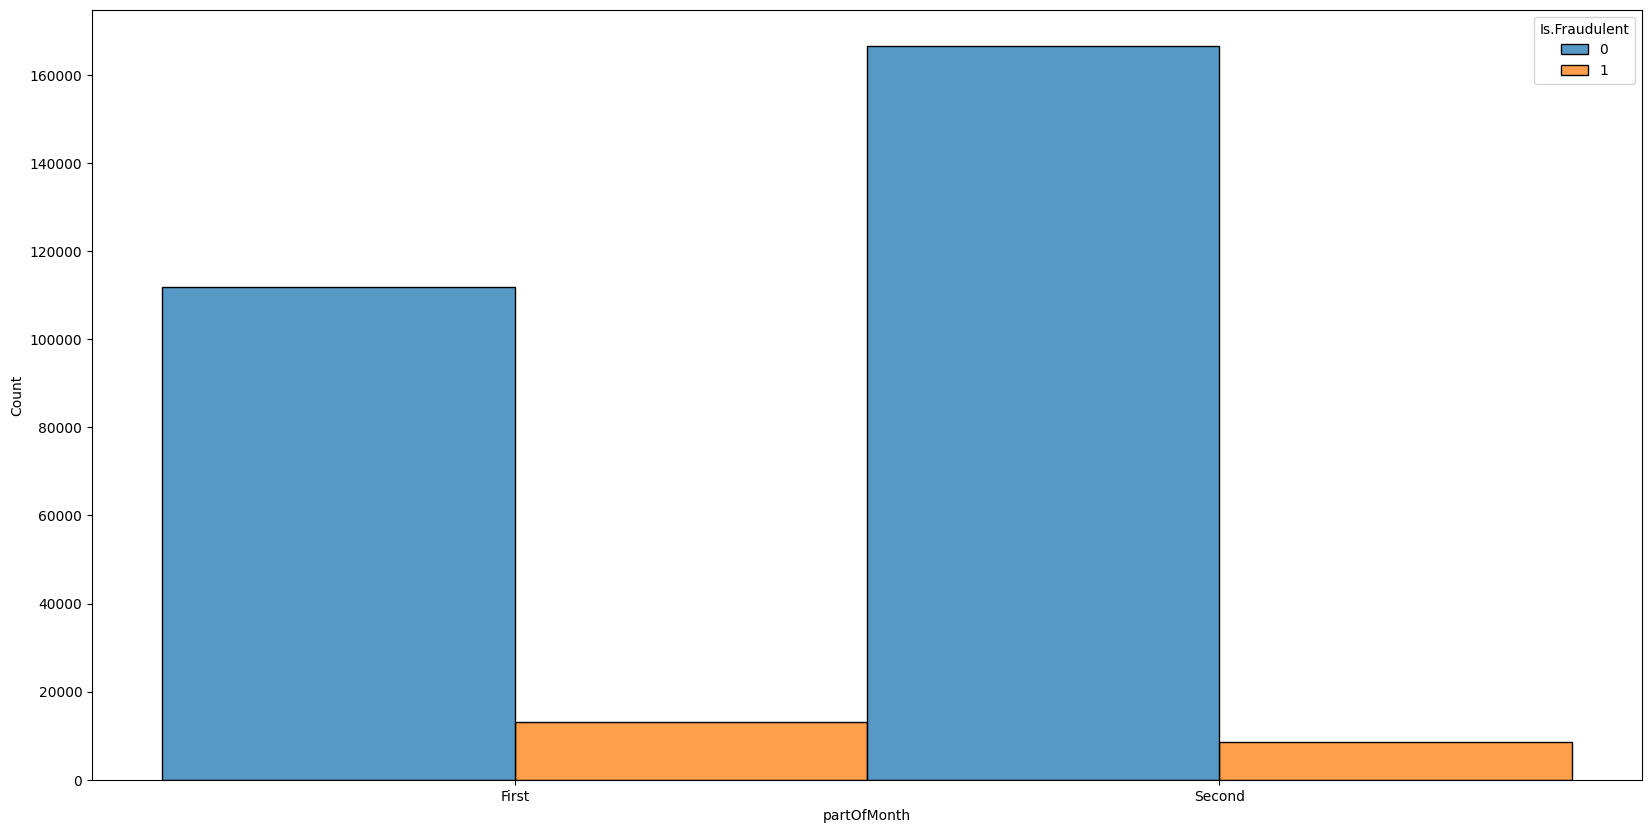

In [109]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df,x="partOfMonth",hue="Is.Fraudulent",multiple="dodge" ) 

In [79]:
# Convert Month to Sinusoidal Representation
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

# Convert Hour to Sinusoidal Representation
df["hour_sin"] = np.sin(2 * np.pi * df["Transaction.Hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["Transaction.Hour"] / 24)

df["hour_angle"] = np.arctan2(df["hour_sin"], df["hour_cos"])
df["month_angle"]=np.arctan2(df["month_sin"],df["month_cos"]) 

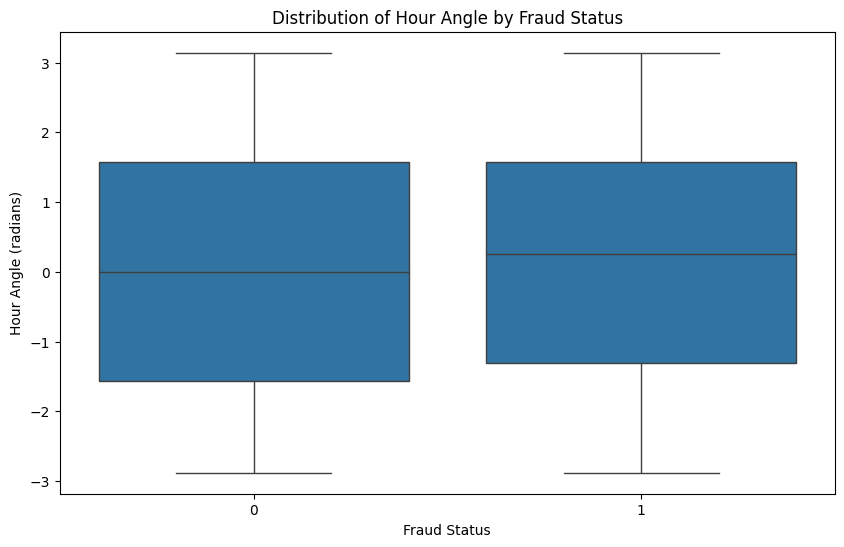

In [69]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Is.Fraudulent', y='hour_angle')
plt.title('Distribution of Hour Angle by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Hour Angle (radians)')
plt.show()


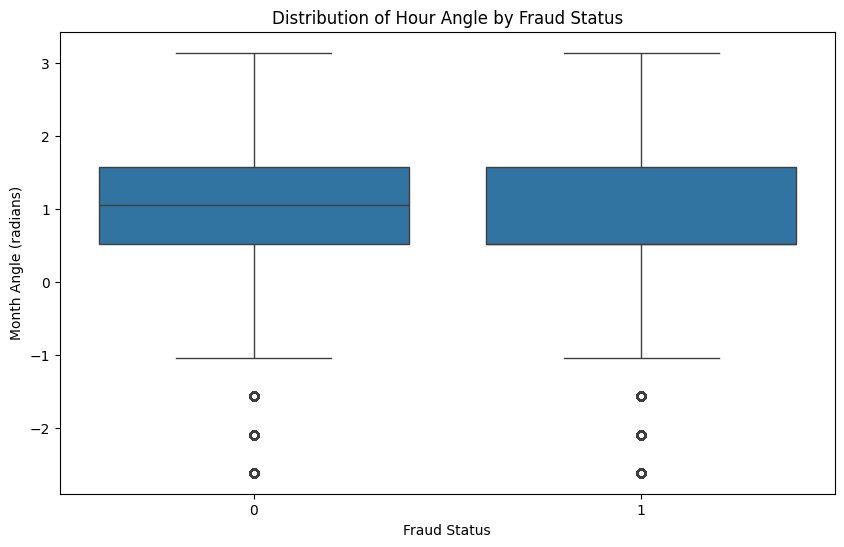

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Is.Fraudulent', y='month_angle')
plt.title('Distribution of Hour Angle by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Month Angle (radians)')
plt.show()

In [83]:
# MINOR 
# PERHAPS?
df["Is.Minor"]=df["Customer.Age"].apply(lambda x : True if x<18 else False) 

In [102]:
sum(df["Is.Fraudulent"])/df.shape[0] 

0.07201

In [101]:
df.loc[(df["Is.Minor"] == 1) & (df["Is.Fraudulent"] == 1)].shape[0]/df.loc[df["Is.Minor"]==1].shape[0]

0.054245283018867926

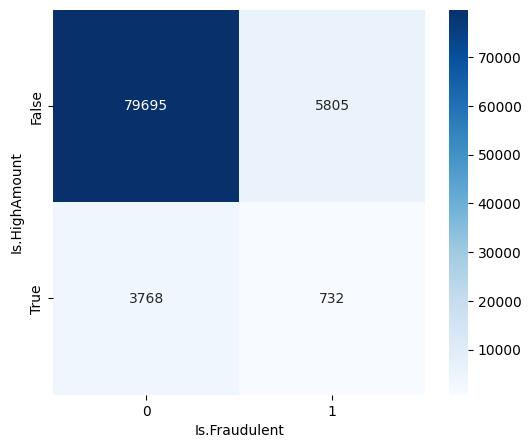

In [133]:

#NOTHING FANCY

#HIGH AMOUNT 
HighAmountInt=df["Transaction.Amount"].quantile(0.95)
df["Is.HighAmount"]=df["Transaction.Amount"].apply(lambda x : True if x>=HighAmountInt else False) 

binary_crosstab = pd.crosstab(df["Is.HighAmount"], df["Is.Fraudulent"])

plt.figure(figsize=(6, 5))
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt="d")
plt.show()

